# Páginas útiles

https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.to_file.html

https://geopandas.org/en/stable/docs/user_guide/mergingdata.html

In [ ]:
import geopandas as gpd

# Load the shapefile
gdf = gpd.read_file("Caminos Naturales/CCNN_ETAPAS_06_24_3D_GENE.shp")

In [4]:
gdf.head()

,ID,NOM_CAMINO,TIPOLOGIA,NOM_ETAPA,LONGITUD,ETAPA,CCAA,PROVINCIA,HUSO,ID_SECTOR,ID_CAMINO,COD_CAMINO,ID_ETAPA,LONG_3D_GE,NUM_CAMINO,NOM_TOTAL,geometry
0,778,Camino Natural de Anaga - Chasna,CN por etapas (5),Etapa 1: La Esperanza - La Caldera,30.924081,1,Canarias,Santa Cruz de Tenerife,28,7,2,070201,1,31.383690,702,VII.2,"LINESTRING Z (-815371.457 3221196.443 904.814,..."
1,779,Camino Natural de Anaga - Chasna,CN por etapas (5),Etapa 2: La Caldera - El Portillo,14.171262,2,Canarias,Santa Cruz de Tenerife,28,7,2,070202,2,14.312797,702,VII.2,LINESTRING Z (-829904.988 3212189.657 1191.408...
2,780,Camino Natural de Anaga - Chasna,CN por etapas (5),Etapa 3: El Portillo - Parador de Las Cañadas ...,16.686617,3,Canarias,Santa Cruz de Tenerife,28,7,2,070203,3,16.705901,702,VII.2,"LINESTRING Z (-836999.645 3206762.932 2046.85,..."
3,781,Camino Natural de Anaga - Chasna,CN por etapas (5),Etapa 4: Parador de Las Cañadas del Teide - Vi...,15.420307,4,Canarias,Santa Cruz de Tenerife,28,7,2,070204,4,15.569765,702,VII.2,"LINESTRING Z (-844097.461 3198517.026 2147.93,..."
4,782,Camino Natural de Anaga - Chasna,CN por etapas (5),Etapa 5: Vilaflor - Arona,18.017360,5,Canarias,Santa Cruz de Tenerife,28,7,2,070205,5,18.199957,702,VII.2,LINESTRING Z (-845922.755 3191423.904 1427.128...


In [7]:
gdf.geom_type.value_counts()

LineString         734
MultiLineString     28
Name: count, dtype: int64

In [11]:
# Extract points from MultiLineStrings and LineStrings
def extract_points(geometry):
    if geometry.geom_type == "LineString":
        return list(geometry.coords)
    elif geometry.geom_type == "MultiLineString":
        return [point for line in geometry.geoms for point in line.coords]  # Flatten
    else:
        return []  # Ignore other geometries

# Apply function to all geometries
route_points = gdf.geometry.apply(extract_points)

# Flatten the list of points
all_points = [point for route in route_points for point in route]

print(all_points[:10])  # Print the first 10 points

[(-815371.4573264641, 3221196.4427660396, 904.8142999999982), (-815376.068087867, 3221196.5044530733, 906.2997000000032), (-815380.9089686205, 3221195.638984879, 907.5543999999936), (-815384.7566575503, 3221193.8577036588, 907.8742000000057), (-815386.2374344612, 3221192.6503973906, 908.1186000000016), (-815388.9551962027, 3221191.2973441933, 908.3616000000038), (-815390.9986063212, 3221191.2336383318, 908.4955999999947), (-815397.7961969958, 3221193.8263187045, 910.6282000000065), (-815399.7849135967, 3221194.300229713, 911.2526999999973), (-815402.5413661627, 3221193.901678995, 911.8285000000033)]


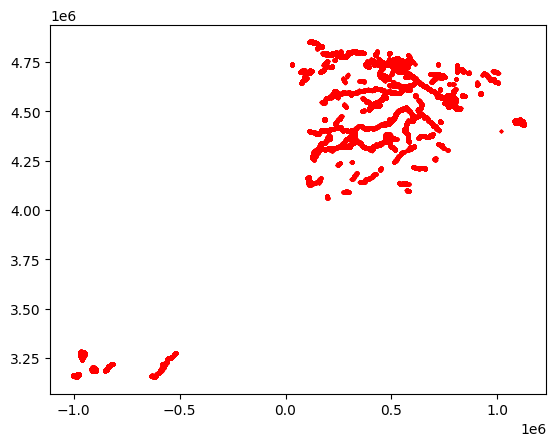

In [ ]:
import matplotlib.pyplot as plt

# Convert points into a DataFrame
x = [point[0] for point in all_points]
y = [point[1] for point in all_points]

plt.scatter(x, y, s=2, color="red")  # Small dots for points
plt.show()

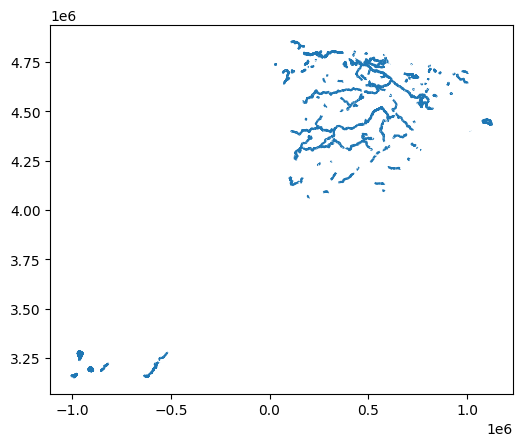

In [ ]:
import matplotlib.pyplot as plt

gdf.plot()
plt.show()

<Figure size 1000x1000 with 0 Axes>

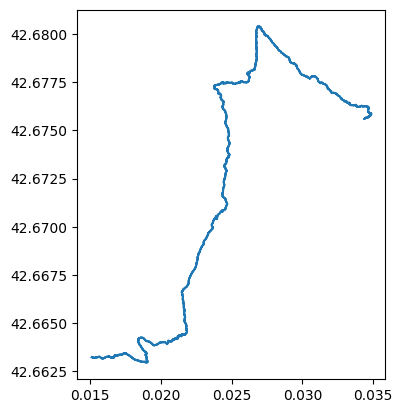

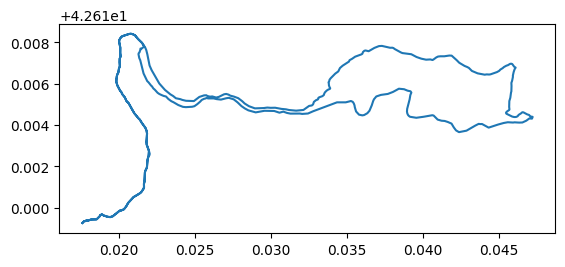

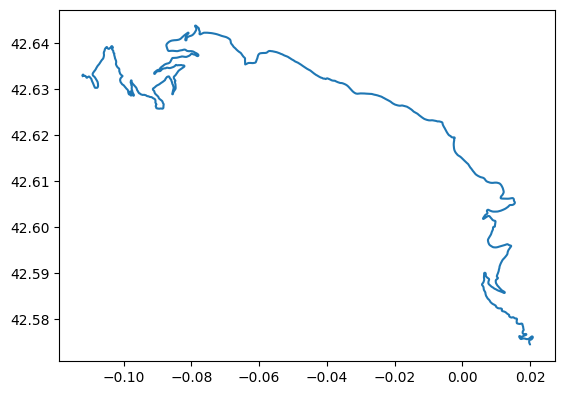

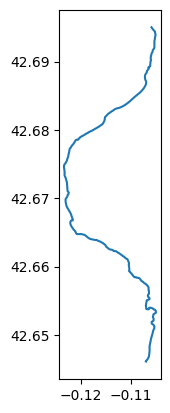

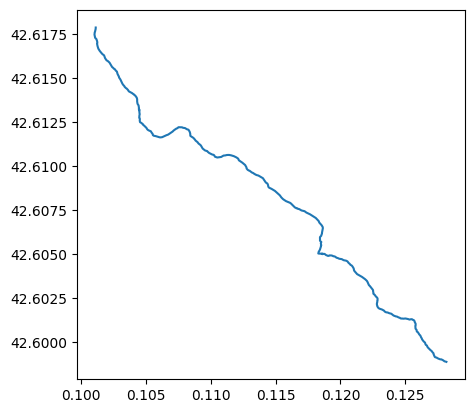

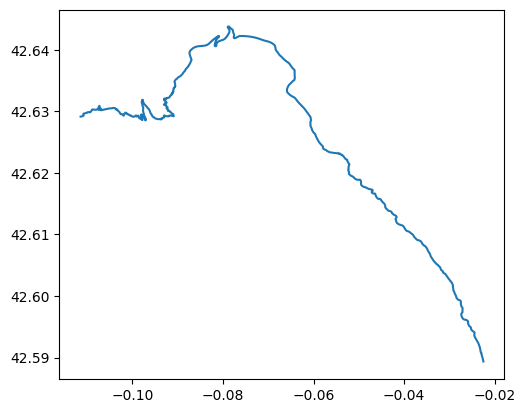

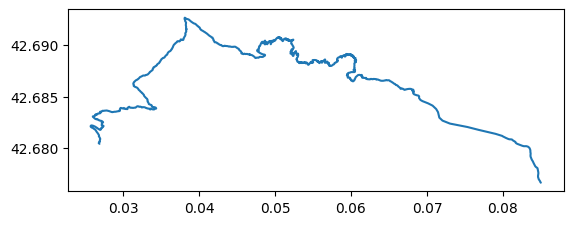

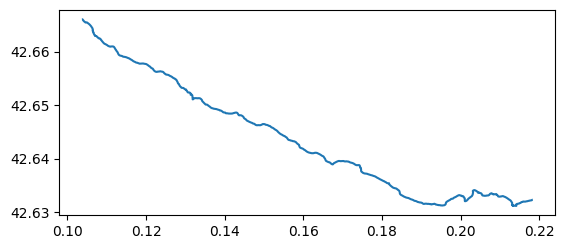

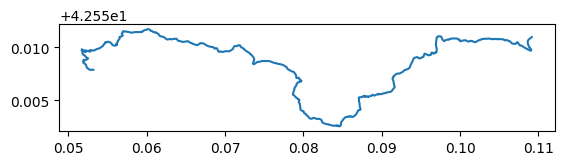

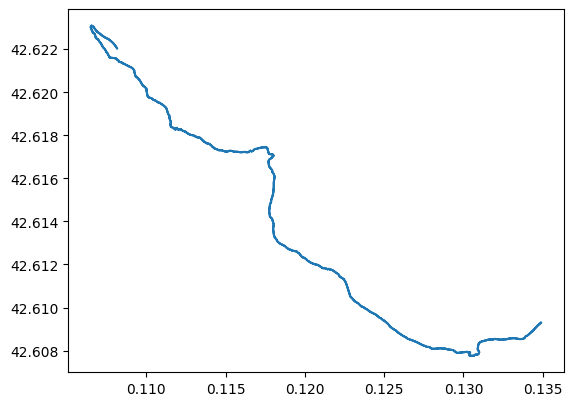

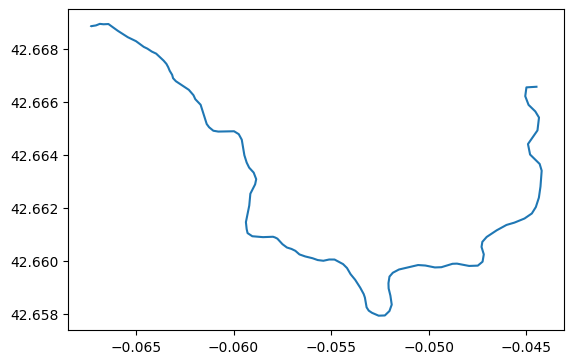

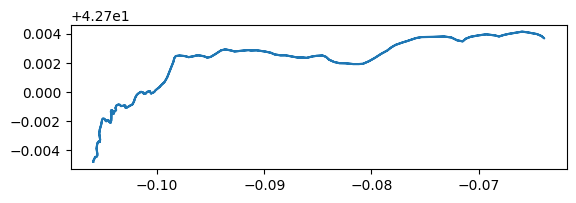

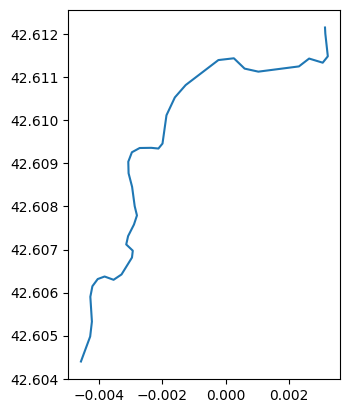

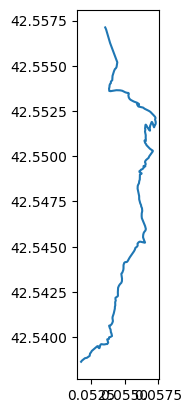

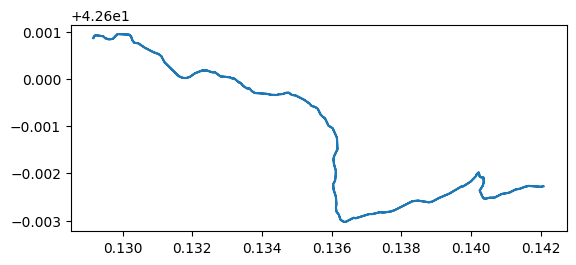

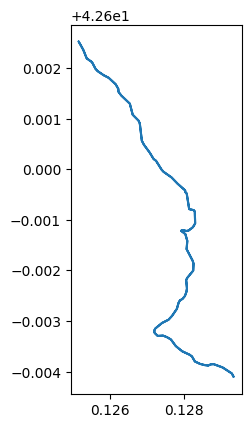

In [2]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
# List available layers in the KML file
for i, file in enumerate(os.listdir("Rutas Parques Naturales/01-Ordesa_y_Monte_Perdido")):
    if i > 15:
        break
    if file.endswith(".kml"):
        gdf = gpd.read_file(f"Rutas Parques Naturales/01-Ordesa_y_Monte_Perdido/{file}", driver="KML", layer=file[:-4])
        gdf.plot()
plt.show()